In [1]:
# Load Data into MongoDB
import pandas as pd
from pymongo import MongoClient

# Load the dataset
file_path = r'C:\repos\Project_3_Team_8\rbhatia\play_by_play_2024.csv'
df = pd.read_csv(file_path, low_memory=False)

# Connect to MongoDB (MongoDB connection string if necessary)
client = MongoClient("mongodb://localhost:27017/")  # Replace with MongoDB URI
db = client['nfl_database']
collection = db['week1_data']

# Insert data into MongoDB
# Convert DataFrame to dictionary records
data_dict = df.to_dict("records")
collection.insert_many(data_dict)

print("Data loaded into MongoDB successfully!")


Data loaded into MongoDB successfully!


In [2]:
# Query and Analyze Data from MongoDB
# Query the database for Week 1 data
week1_data = collection.find({"week": 1})

# Convert MongoDB cursor to DataFrame for analysis
week1_df = pd.DataFrame(list(week1_data))

# Summarize offensive and defensive EPA
offensive_performance = week1_df.groupby('posteam')['epa'].sum().reset_index().rename(columns={'epa': 'offensive_epa'})
defensive_performance = week1_df.groupby('defteam')['epa'].sum().reset_index().rename(columns={'epa': 'defensive_epa'})

# Merge offensive and defensive performance data
performance = pd.merge(offensive_performance, defensive_performance, left_on='posteam', right_on='defteam', suffixes=('_offense', '_defense'))
performance = performance[['posteam', 'offensive_epa', 'defensive_epa']]

# Calculate percentages for offensive and defensive EPA
performance['offensive_percentage'] = 100 * (performance['offensive_epa'] / performance['offensive_epa'].sum())
performance['defensive_percentage'] = 100 * (performance['defensive_epa'] / performance['defensive_epa'].sum())

# Display the performance DataFrame
performance


,posteam,offensive_epa,defensive_epa,offensive_percentage,defensive_percentage
0,ARI,32.185125,45.925784,-20.725792,-29.574166
1,ATL,-50.303253,-10.220044,32.393062,6.581254
2,BAL,5.926818,26.078602,-3.816607,-16.793462
3,BUF,45.925784,32.185125,-29.574166,-20.725792
4,CAR,-87.708266,47.799686,56.480230,-30.780876
5,CHI,-45.271109,-69.293534,29.152585,44.621960
6,CIN,-7.028064,18.899866,4.525761,-12.170675
7,CLE,-71.819344,-9.525074,46.248469,6.133725
8,DAL,-9.525074,-71.819344,6.133725,46.248469
9,DEN,-37.105724,-12.141718,23.894439,7.818727


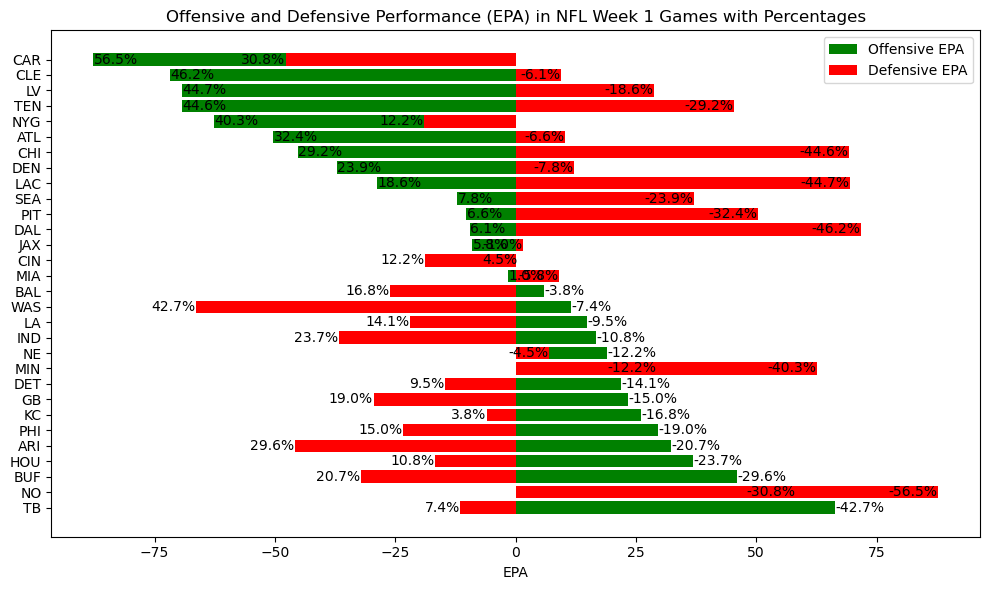

In [3]:
# Visualize the Results
import matplotlib.pyplot as plt

# Sort teams by offensive EPA for visualization
performance_sorted = performance.sort_values(by='offensive_epa', ascending=False)

# Plot the results with percentages on the bars
plt.figure(figsize=(10, 6))

# Plot offensive EPA with percentages
bars = plt.barh(performance_sorted['posteam'], performance_sorted['offensive_epa'], color='green', label='Offensive EPA')

# Add offensive percentage labels
for bar, percentage in zip(bars, performance_sorted['offensive_percentage']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

# Plot defensive EPA (negate for visualization) with percentages
bars_defense = plt.barh(performance_sorted['posteam'], -performance_sorted['defensive_epa'], color='red', label='Defensive EPA')

# Add defensive percentage labels
for bar, percentage in zip(bars_defense, performance_sorted['defensive_percentage']):
    plt.text(bar.get_width() - 0.1, bar.get_y() + bar.get_height()/2, f'{-percentage:.1f}%', va='center', ha='right')

plt.xlabel('EPA')
plt.title('Offensive and Defensive Performance (EPA) in NFL Week 1 Games with Percentages')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
# The best team for each category:
import pandas as pd

# Load the CSV file
file_path = r'C:\repos\Project_3_Team_8\rbhatia\play_by_play_2024.csv'
df = pd.read_csv(file_path, low_memory=False)

# Filter data for Week 1 games
week1_data = df[df['week'] == 1]

# Calculate offensive performance (sum of EPA) for each team
offensive_performance = week1_data.groupby('posteam')['epa'].sum().reset_index().rename(columns={'epa': 'offensive_epa'})

# Calculate defensive performance (sum of EPA allowed) for each team
defensive_performance = week1_data.groupby('defteam')['epa'].sum().reset_index().rename(columns={'epa': 'defensive_epa'})

# Merge offensive and defensive performance data
performance = pd.merge(offensive_performance, defensive_performance, left_on='posteam', right_on='defteam', suffixes=('_offense', '_defense'))
performance = performance[['posteam', 'offensive_epa', 'defensive_epa']]

# Calculate percentages for offensive and defensive EPA
performance['offensive_percentage'] = 100 * (performance['offensive_epa'] / performance['offensive_epa'].sum())
performance['defensive_percentage'] = 100 * (performance['defensive_epa'] / performance['defensive_epa'].sum())

# Sort teams by offensive and defensive performance for visualization
performance_sorted_offense = performance.sort_values(by='offensive_epa', ascending=False)
performance_sorted_defense = performance.sort_values(by='defensive_epa', ascending=True)

# Best offensive team and best defensive team
best_offensive_team = performance_sorted_offense.iloc[0]
best_defensive_team = performance_sorted_defense.iloc[0]

best_offensive_team, best_defensive_team


(posteam                        TB
 offensive_epa           22.109116
 defensive_epa            3.823221
 offensive_percentage   -42.711869
 defensive_percentage    -7.385955
 Name: 27, dtype: object,
 posteam                        NO
 offensive_epa           15.933229
 defensive_epa          -29.236089
 offensive_percentage   -30.780876
 defensive_percentage     56.48023
 Name: 22, dtype: object)